# Shakespeare and his favorite words

In the work below I'm taking the [Folger Shakespeare](https://shakespeare.folger.edu/cite/) corpus of the collected works of Shakespeare and find the 100 most frequent words. The pipeline has the following steps:

1. Load and tokenize the text from the individual files
2. Normalize the tokens
3. Count and sort the tokens
4. Remove stop words (using [this list](https://gist.github.com/sebleier/554280))

In [1]:
import os

corpus_path = "../exercise-5/corpus/"
file_paths = [os.path.join(corpus_path, f) for f in os.listdir(corpus_path) if os.path.isfile(os.path.join(corpus_path, f))]

tokens = []
for path in file_paths:
    with open(path, "r", encoding="utf-8") as f:
        tokens_ = f.read().split()
        tokens.extend([token.lower().strip().strip(".,!?[]()=-") for token in tokens_])

print(tokens[:5])

['much', 'ado', 'about', 'nothing', 'by']


In [11]:
counts = {}
for token in tokens:
    if token in counts:
        counts[token] = counts[token] + 1
    else:
        counts[token] = 1
        
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

In [25]:
stop_words = []
with open("stopwords.txt", "r", encoding="utf-8") as f:
    stop_words = f.read().split()

filtered_counts = [ (word, frequency) for (word, frequency) in sorted_counts if word not in stop_words ]

for (token, frequency) in filtered_counts[:100]:
    print("{token}\t\t\t ({frequency} occurences)".format(token=token, frequency=frequency))

thou			 (5864 occurences)
thy			 (4329 occurences)
shall			 (3837 occurences)
thee			 (3309 occurences)
lord			 (3078 occurences)
good			 (2876 occurences)
king			 (2826 occurences)
sir			 (2765 occurences)
come			 (2527 occurences)
enter			 (2506 occurences)
would			 (2457 occurences)
o			 (2249 occurences)
let			 (2207 occurences)
love			 (2199 occurences)
well			 (2192 occurences)
hath			 (2049 occurences)
man			 (1947 occurences)
one			 (1917 occurences)
like			 (1905 occurences)
upon			 (1879 occurences)
i'll			 (1876 occurences)
may			 (1774 occurences)
make			 (1770 occurences)
know			 (1754 occurences)
go			 (1754 occurences)
say			 (1725 occurences)
yet			 (1708 occurences)
us			 (1704 occurences)
must			 (1624 occurences)
see			 (1537 occurences)
'tis			 (1489 occurences)
give			 (1407 occurences)
th'			 (1365 occurences)
first			 (1295 occurences)
take			 (1288 occurences)
mine			 (1228 occurences)
't			 (1188 occurences)
speak			 (1178 occurences)
exit			 (1133 occurences)


Filtering out stop words reveals in a rudimentary fashion the primary themes of Shakespeares work: Royalty (*lord*, *kind*, *sir*) and *love*; which pretty much sums it up.

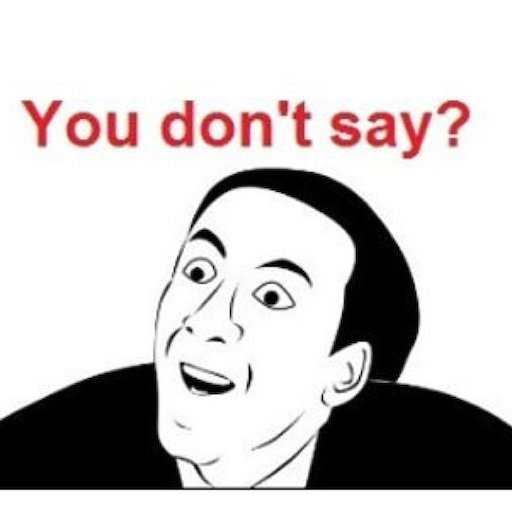

In [7]:
with open("output.txt", "w", encoding="utf-8") as f:
    for i, (token, count) in enumerate(sorted_counts):
        f.write(str(i+1) + ", " + token + ", " + str(count))